##### Financial News vs Stock dat Corelation Analysis 
##### imporing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

#### Loading dataset as dataframe

In [2]:
apple = pd.read_csv('../data/AAPL_historical_data.csv')
amazon = pd.read_csv('../data/AMZN_historical_data.csv')
google = pd.read_csv('../data/GOOG_historical_data.csv')
meta = pd.read_csv('../data/META_historical_data.csv')
microsoft = pd.read_csv('../data/MSFT_historical_data.csv')
nividia = pd.read_csv('../data/NVDA_historical_data.csv')
tesla = pd.read_csv('../data/TSLA_historical_data.csv')

news_df = pd.read_csv('../data/raw_analyst_ratings.csv')

#### Adding Company Column
##### Objective

In [3]:
# Add a 'Company' column to each dataframe
apple['Company'] = 'Apple'
amazon['Company'] = 'Amazon'
google['Company'] = 'Google'
meta['Company'] = 'Meta'
microsoft['Company'] = 'Microsoft'
nividia['Company'] = 'Nvidia'
tesla['Company'] = 'Tesla'

# Concatenate the dataframes
stock_df = pd.concat([apple, amazon, google, meta, microsoft, nividia, tesla])

In [7]:
news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,Apple
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,Apple
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,Apple
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,Apple


In [9]:
news_df.shape, stock_df.shape

((1048575, 6), (45428, 10))

In [10]:
news_df= news_df.drop(news_df.columns[0], axis=1)

Load and Normalize Data:

Load Datasets:

In [11]:
# Convert 'date' columns to datetime
news_df['date'] = pd.to_datetime(news_df['date'],  errors='coerce').dt.tz_localize(None)
stock_df['Date'] = pd.to_datetime(stock_df['Date'],  errors='coerce').dt.tz_localize(None)

In [12]:
news_df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A


In [13]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,Apple
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,Apple
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,Apple
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,Apple


In [14]:
news_df.columns, stock_df.columns

(Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object'),
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Dividends', 'Stock Splits', 'Company'],
       dtype='object'))

In [15]:
# Rename 'Date' column to 'date' in stock_df and convert to datetime format
stock_df.rename(columns={'Date': 'date'}, inplace=True)

In [16]:
# Format 'date' column to 'yyyy-mm-dd' format
news_df['date'] = news_df['date'].dt.strftime('%Y-%m-%d')
stock_df['date'] = stock_df['date'].dt.strftime('%Y-%m-%d')

In [18]:
news_df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [19]:
stock_df.head()

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,Apple
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,Apple
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,Apple
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,Apple


In [20]:
# Merge the two DataFrames on the 'date' column
merged_df = pd.merge(news_df, stock_df, on='date')
merged_df.head()

,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,Apple
1,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,Amazon
2,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0,Google
3,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,Meta
4,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0,Microsoft


In [21]:
merged_df.shape

(285028, 14)

In [22]:
merged_df.isnull().sum()

headline        0
url             0
publisher       0
date            0
stock           0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

In [23]:
merged_df.duplicated().sum()

np.int64(0)

In [24]:
merged_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,285028.000000,285028.000000,285028.000000,285028.000000,285028.000000,2.850280e+05,285028.000000,285028.000000
mean,76.112213,77.277876,75.071377,76.210124,74.925382,1.551295e+08,0.001723,0.000126
std,62.452522,63.369883,61.634852,62.555049,61.797186,2.026702e+08,0.025837,0.023993
min,0.287250,0.290750,0.278750,0.284500,0.260951,1.584340e+05,0.000000,0.000000
25%,24.667500,25.059999,24.080000,24.665001,23.302501,3.241000e+07,0.000000,0.000000
50%,61.566666,62.944500,60.610668,61.232498,60.253620,7.587200e+07,0.000000,0.000000
75%,116.472000,117.570000,114.209999,115.799500,115.704002,1.896200e+08,0.000000,0.000000
max,240.960007,241.210007,235.279999,238.669998,238.180557,3.692928e+09,0.510000,7.000000


In [27]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [26]:
merged_df['sentiment'] = merged_df['headline'].apply(analyze_sentiment)

In [28]:
# Save the sentimented dataset to a CSV file
merged_df.to_csv('sentimented_df.csv', index=False)

In [29]:
merged_df.head()

,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,Apple,0.0
1,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,Amazon,0.0
2,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0,Google,0.0
3,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,Meta,0.0
4,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0,Microsoft,0.0


In [30]:
# Calculate daily stock returns
merged_df['Daily Return'] = merged_df['Close'].pct_change() * 100

In [32]:
merged_df.head()

,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,sentiment,Daily Return
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,Apple,0.0,NaN
1,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,Amazon,0.0,49.803923
2,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0,Google,0.0,-42.070478
3,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,Meta,0.0,220.872638
4,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0,Microsoft,0.0,-18.880273


In [33]:
# Aggregate sentiments by date
daily_sentiment = merged_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['date', 'Average Sentiment']

In [34]:
daily_sentiment.head()

,date,Average Sentiment
0,2011-04-27,0.000000
1,2011-04-28,0.068182
2,2011-04-29,0.166667
3,2011-05-02,0.000000
4,2011-05-03,0.000000


In [35]:
# Merge sentiment data with stock data
daily_df = pd.merge(merged_df[['date', 'Daily Return']], daily_sentiment, on='date', how='inner')

In [36]:
daily_df.head()

,date,Daily Return,Average Sentiment
0,2020-06-05,NaN,0.10836
1,2020-06-05,49.803923,0.10836
2,2020-06-05,-42.070478,0.10836
3,2020-06-05,220.872638,0.10836
4,2020-06-05,-18.880273,0.10836


In [37]:
# Calculate correlation
correlation = daily_df[['Average Sentiment', 'Daily Return']].corr().iloc[0, 1]
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.000577290186737864


In [ ]:
import pandas as pd
from datetime import datetime

# Define the file paths and corresponding company names or tickers
file_paths = {
    'Apple': r'D:/10Acadamy/week1_challenge/data/AAPL_historical_data.csv',
    'Amazon': r'D:/10Acadamy/week1_challenge/data/AMZN_historical_data.csv',
    'Google': r'D:/10Acadamy/week1_challenge/data/GOOG_historical_data.csv',
    'Meta': r'D:/10Acadamy/week1_challenge/data/META_historical_data.csv',
    'Microsoft': r'D:/10Acadamy/week1_challenge/data/MSFT_historical_data.csv',
    'Nvidia': r'D:/10Acadamy/week1_challenge/data/NVDA_historical_data.csv',
    'Tesla': r'D:/10Acadamy/week1_challenge/data/TSLA_historical_data.csv',
    'News': r'D:/10Acadamy/week1_challenge/data/raw_analyst_ratings.csv'
}

# Load news dataset
news_df = pd.read_csv(file_paths['News'])

# Create an empty dictionary to hold the DataFrames for each company
stock_data = {}

# Loop through the file paths and read each CSV file into a DataFrame
for company, file_path in file_paths.items():
    if company != 'News':  # Skip the news file path
        stock_data[company] = pd.read_csv(file_path)

# 1.1 Convert Date Columns to Same Format for News and Stock Data
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Convert stock data dates to the same format
for company, df in stock_data.items():
    df['date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')  # Assuming the column name is 'Date'

# 1.2 Filter out non-trading days from the news data by aligning dates
for company, df in stock_data.items():
    news_df = news_df[news_df['date'].isin(df['date'])]

# Check for missing or inconsistent dates
for company, df in stock_data.items():
    missing_dates = set(news_df['date']) - set(df['date'])
    if missing_dates:
        print(f"Missing Dates in {company}: ", missing_dates)

# Example to show the first few rows of the DataFrame for 'Apple'
print(stock_data['Apple'].head())


FileNotFoundError: [Errno 2] No such file or directory: '/data/TSLA_historical_data.csv'

                 Stock Movement

In [49]:
# Loop through each company's DataFrame in the stock_data dictionary
for company, df in stock_data.items():
    # Compute Daily Stock Returns
    df['daily_return'] = df['Close'].pct_change()  # Assuming 'Close' is the column name for closing prices
    
    # Verify the results by checking a few rows for each company
    print(f"Daily Returns for {company}:")
    print(df[['Date', 'Close', 'daily_return']].head(10))

Daily Returns for Apple:
         Date     Close  daily_return
0  1980-12-12  0.128348           NaN
1  1980-12-15  0.121652     -0.052171
2  1980-12-16  0.112723     -0.073398
3  1980-12-17  0.115513      0.024751
4  1980-12-18  0.118862      0.028992
5  1980-12-19  0.126116      0.061029
6  1980-12-22  0.132254      0.048670
7  1980-12-23  0.137835      0.042199
8  1980-12-24  0.145089      0.052628
9  1980-12-26  0.158482      0.092309
Daily Returns for Amazon:
         Date     Close  daily_return
0  1997-05-15  0.097917           NaN
1  1997-05-16  0.086458     -0.117028
2  1997-05-19  0.085417     -0.012040
3  1997-05-20  0.081771     -0.042685
4  1997-05-21  0.071354     -0.127392
5  1997-05-22  0.069792     -0.021891
6  1997-05-23  0.075000      0.074622
7  1997-05-27  0.079167      0.055560
8  1997-05-28  0.076563     -0.032892
9  1997-05-29  0.075260     -0.017019
Daily Returns for Google:
         Date     Close  daily_return
0  2004-08-19  2.499133           NaN
1  2004-08-

 Visualizations

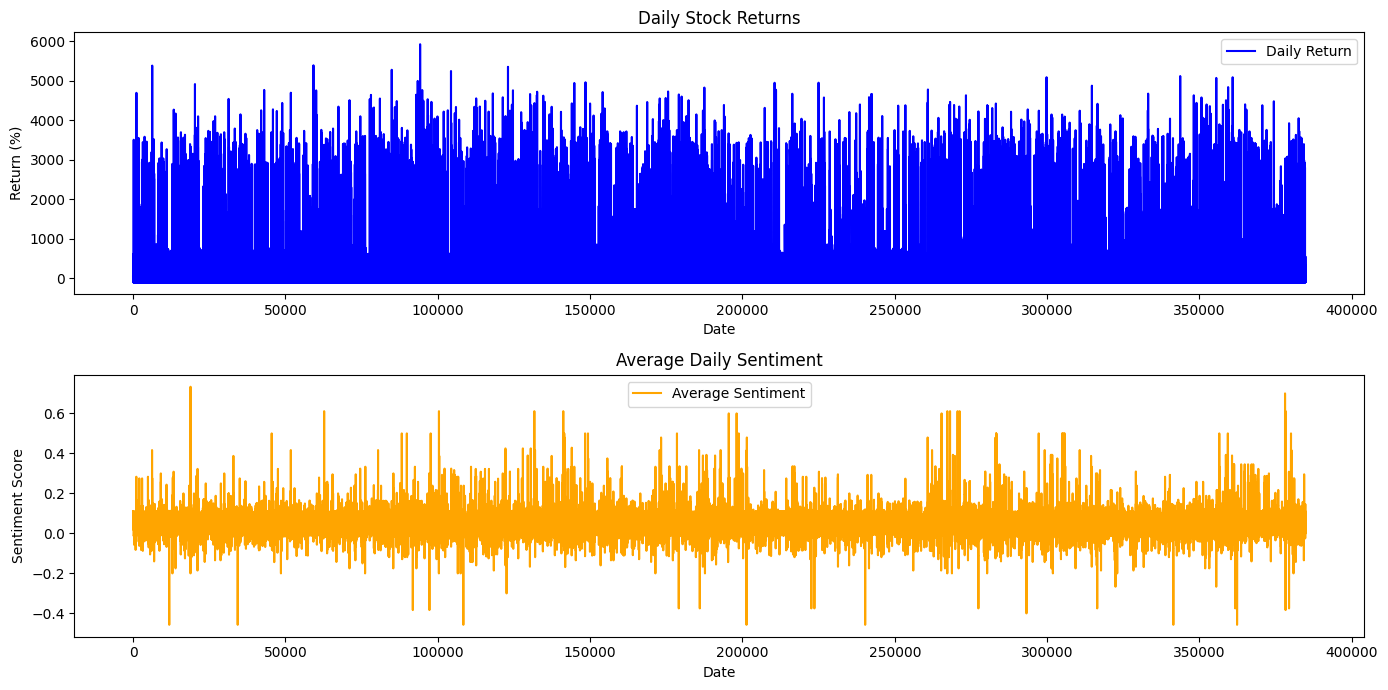

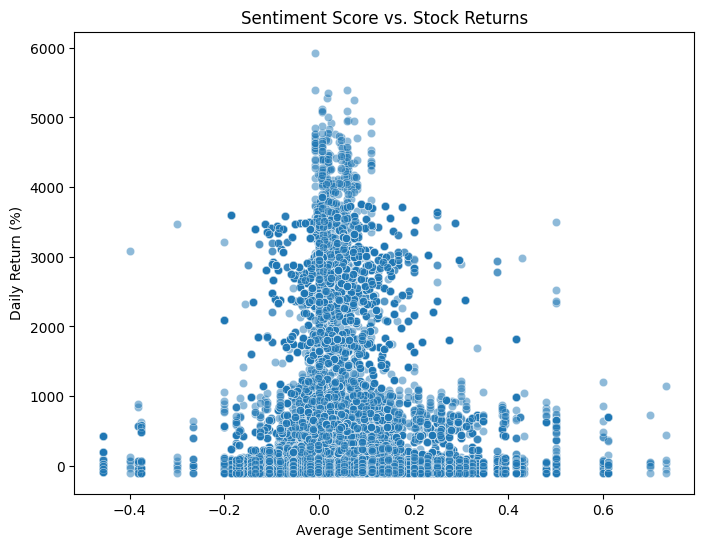

In [39]:
# Plot daily returns and average sentiment
plt.figure(figsize=(14, 7))

# Plot stock returns
plt.subplot(2, 1, 1)
plt.plot(daily_df.index, daily_df['Daily Return'], label='Daily Return', color='blue')
plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()

# Plot average sentiment
plt.subplot(2, 1, 2)
plt.plot(daily_df.index, daily_df['Average Sentiment'], label='Average Sentiment', color='orange')
plt.title('Average Daily Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plot to visualize correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily_df, x='Average Sentiment', y='Daily Return', alpha=0.5)
plt.title('Sentiment Score vs. Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Return (%)')
plt.show()

In [51]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

# 2.1 Perform Sentiment Analysis
def get_sentiment(headline):
    analysis = TextBlob(headline)
    # Categorize sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity < 0:
        return -1
    else:
        return 0

news_df['sentiment'] = news_df['headline'].apply(get_sentiment)

# 2.2 Aggregate Sentiment Scores by Date
aggregated_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
aggregated_sentiment.columns = ['date', 'avg_sentiment']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dagi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Pearson Correlation between Sentiment and Stock Returns for Apple: -0.005906770850743066


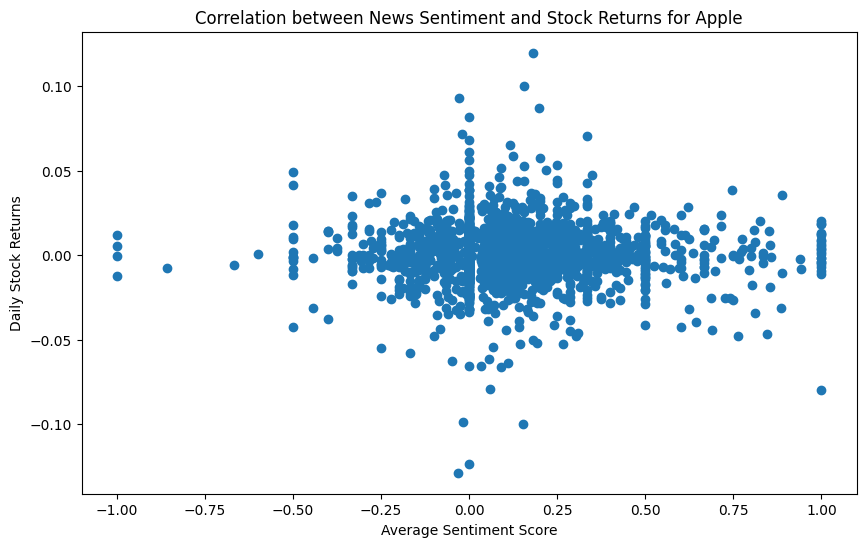

Pearson Correlation between Sentiment and Stock Returns for Amazon: -0.036303714714083675


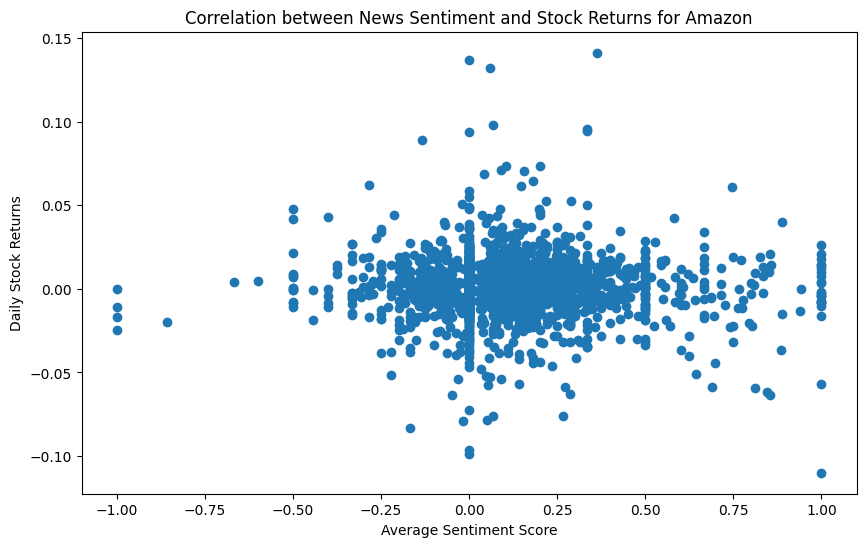

Pearson Correlation between Sentiment and Stock Returns for Google: 0.005009184702044696


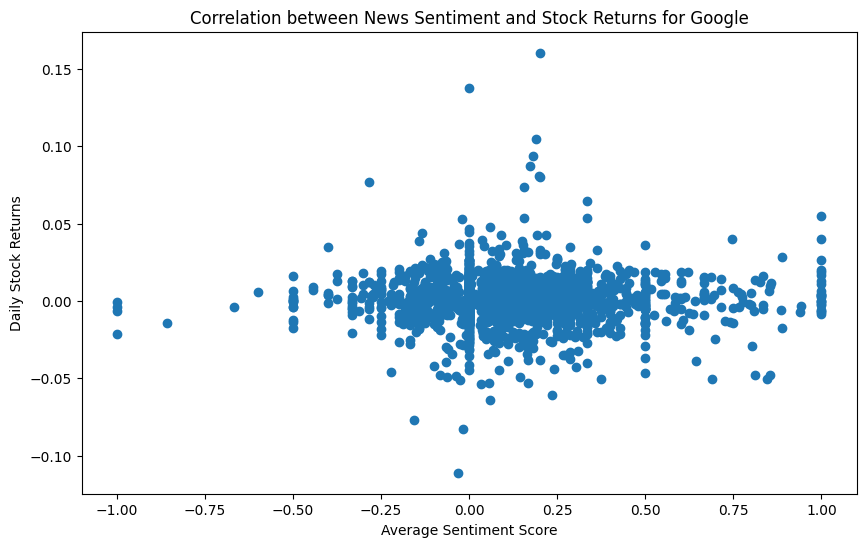

Pearson Correlation between Sentiment and Stock Returns for Meta: 0.004021154727911397


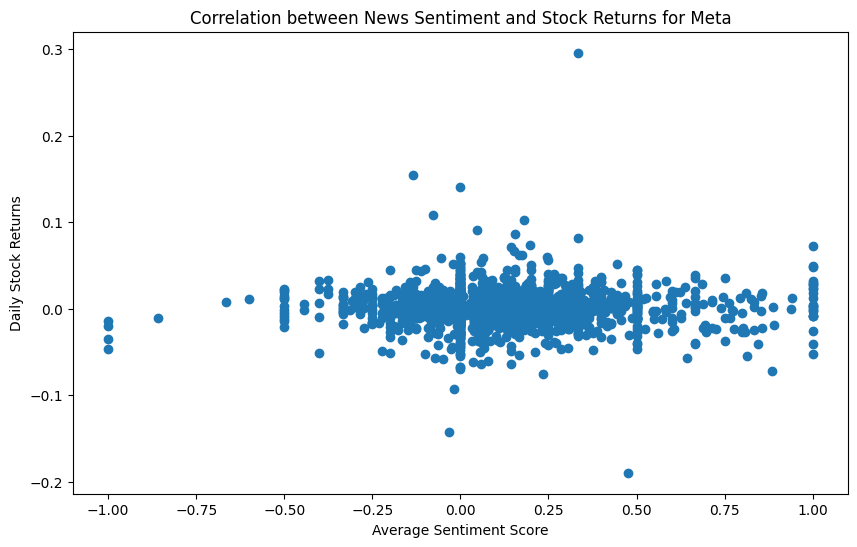

Pearson Correlation between Sentiment and Stock Returns for Microsoft: -0.02462240513082838


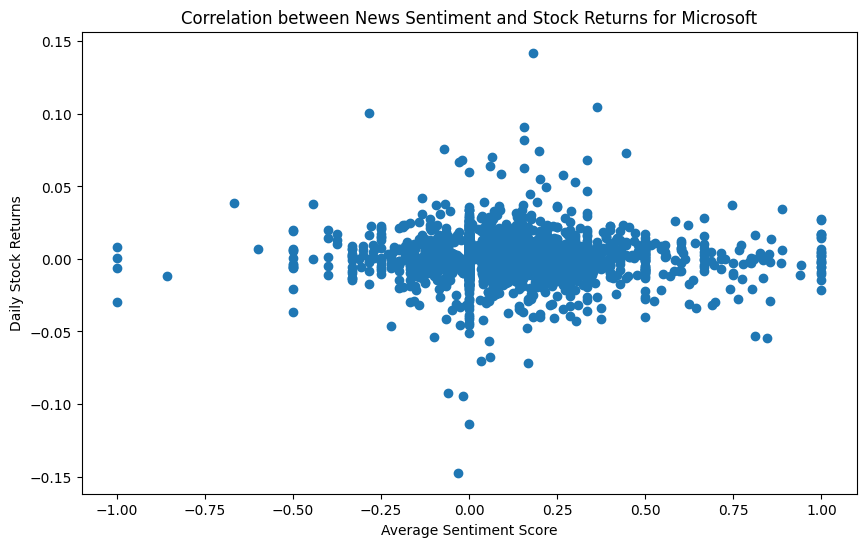

Pearson Correlation between Sentiment and Stock Returns for Nvidia: -0.022563903313552538


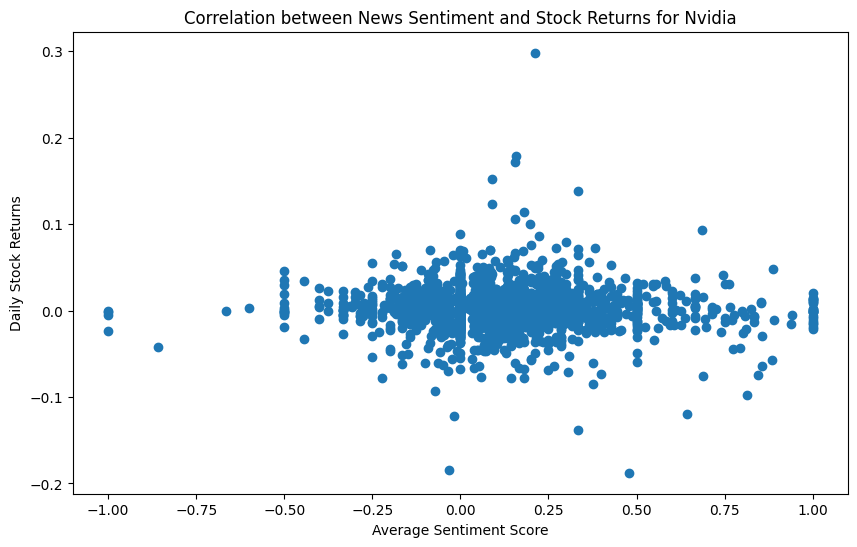

Pearson Correlation between Sentiment and Stock Returns for Tesla: -0.0011129557492297617


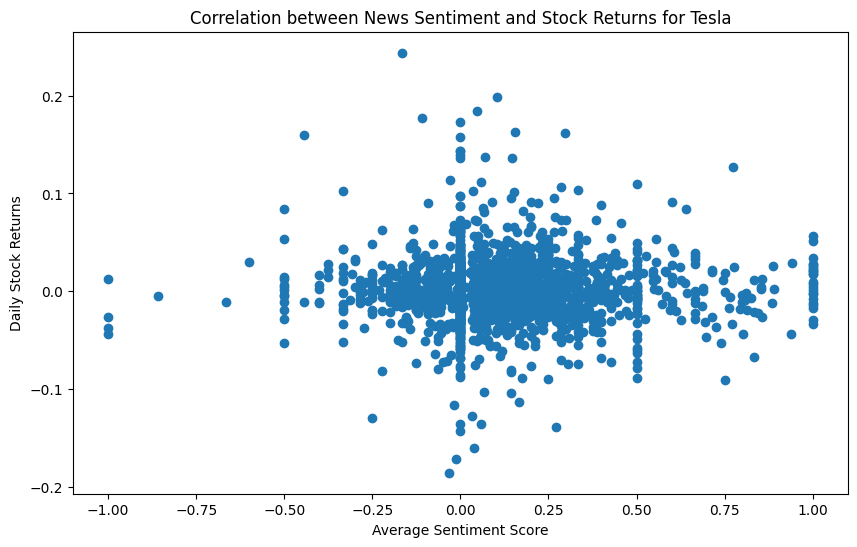

In [52]:
import matplotlib.pyplot as plt
for company, df in stock_data.items():
    # Align Datasets by Date
    merged_df = pd.merge(aggregated_sentiment, df[['Date', 'daily_return']], left_on='date', right_on='Date')
    
    # Drop the redundant 'Date' column after merging
    merged_df.drop(columns=['Date'], inplace=True)

    # Calculate Correlation
    correlation = merged_df['avg_sentiment'].corr(merged_df['daily_return'])
    print(f"Pearson Correlation between Sentiment and Stock Returns for {company}: {correlation}")

    # Visualize the Correlation
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df['avg_sentiment'], merged_df['daily_return'])
    plt.title(f'Correlation between News Sentiment and Stock Returns for {company}')
    plt.xlabel('Average Sentiment Score')
    plt.ylabel('Daily Stock Returns')
    plt.show()